In [30]:
import matplotlib.pylab as plt 
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge

# 1. Cost functions

Lets focus on linear regression of the form 

$\mathbf{y} \approx f(\mathbf{X}) = \mathbf{X}\mathbf{w_1} + \mathbf{w_0}.$


#### 1.1 What are the rows of $\mathbf{X}$?

__< Your answer >__

#### 1.2 What are the columns of $\mathbf{X}$?

__< Your answer >__

Often, we write the equation above as

$\mathbf{y} \approx \mathbf{\tilde{X}}\mathbf{w}$

#### 1.3 How does $\mathbf{\tilde{X}}$ look like in this case (i.e., how does the shape of the matrix change compared to $\mathbf{X}$)?

__< Your answer >__

For machine learning, we need a cost function. Two common choices are the mean-squared error (MSE, $\mathcal{L}_2$), and the mean-absolute error (MAE, $\mathcal{L}_1$)

\begin{align}
    \mathcal{L}_2 &=& \frac{1}{N} \sum_{i=1}^N \left(y_i - f(x_i) \right)^2 \\
    \mathcal{L}_1 &=& \frac{1}{N} \sum_{i=1}^N \left|y_i - f(x_i) \right| 
\end{align}

#### 1.4 In the Jupyter notebook, write a Python function that computes these two cost functions given an error term $\boldsymbol{\epsilon} = \mathbf{y} - \mathbf{\tilde{X}}\mathbf{w}$

In [5]:
def mean_squared_error(error_vector):
    mean_squared_error = np.mean(error_vector ** 2)
    return mean_squared_error

print(mean_squared_error(np.array([0,0,0])))
print(mean_squared_error(np.array([1,1,1])))




0.0
1.0


In [17]:
def mean_absolute_error(error_vector):
    mean_absolute_error = np.mean(np.abs(error_vector))
    return mean_absolute_error

Your code should run as follows

```python
mean_squared_error(np.array([0,0,0]))
> returns 0
```

```python
mean_squared_error(np.array([1,1,1]))
> returns 1
```

#### 1.5 What is the shape of these cost functions as a function of the error

In [28]:
x_axis = np.linspace(-10, 10, 100) # change as you wish for your plot
y_mae = [mean_absolute_error(np.array([x])) for x in x_axis]
y_mse = [mean_squared_error(np.array([x])) for x in x_axis]

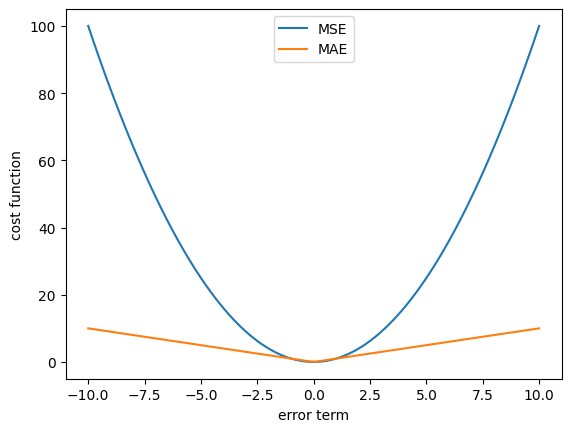

In [38]:

plt.plot(x_axis, y_mse, label='MSE')
plt.plot(x_axis, y_mae, label='MAE')
plt.xlabel('error term')
plt.ylabel('cost function')
plt.legend()
plt.show()

#### 1.6  Are both loss functions differentiable for all $\boldsymbol{\epsilon}$? What implications does this have for gradient based optimization like gradient descent?

__< Your answer >__

#### 1. Which loss function is more sensitive to outliers and why?

__< Your answer >__

# 2. Regularization

Assume that the columns of $\mathbf{X}$ are linearly independent.
As a refresher of linear algebra, recall when the linear system $\mathbf{X}\mathbf{w} = \mathbf{y}$ has

#### 2.1 One unique solution

__< Your answer >__

#### 2.2 No solution

__< Your answer >__

#### 2.3 An infinite number of solutions

__< Your answer >__

#### 2.4 Give a geometrical interpretation of the matrix Rank (10 bonus point if you use the Manim package)

__< Your answer >__

#### 2.5 In general, why can't we solve the linear equation using $\mathbf{y} = \tilde{\mathbf{X}}^{-1}\textbf{w}$? (1 point)

__< Your answer >__

#### 2.6 Differentiate above formula step by step and show what will we have?

__< Your answer >__

#### 2.7 if we want $\| y - \tilde{X} w \|_2^2$ to be minimum, what should the derivative be equal to?

__< Your answer >__

#### 2.8 What is the Hat matrix and what does its diagonal values correspond to?

__< Your answer >__

#### 2.9 What is Willson’s plot and how does it help in outlier detection?

__< Your answer >__

#### 2.10 What happens if some columns are linearly dependent? What is the connection to feature selection?

__< Your answer >__

#### 2.11 What will be the new cost function after adding the regularization term?

__< Your answer >__

#### 2.12 What will be the new 𝑤 when we differentiate the new cost function and set it to zero.

__< Your answer >__

#### 2.13 Prove that the part of Hat matrix where we want to take the inverse from is always reversible after we introduce the regularization term.

__< Your answer >__

#### 2.14  What is the shape of the parabola as a function of $a$?

In [39]:
def parabola(x, a = 1): 
    return a * x ** 2

In [40]:
x_axis_parabola = np.linspace(-10, 10, 100)

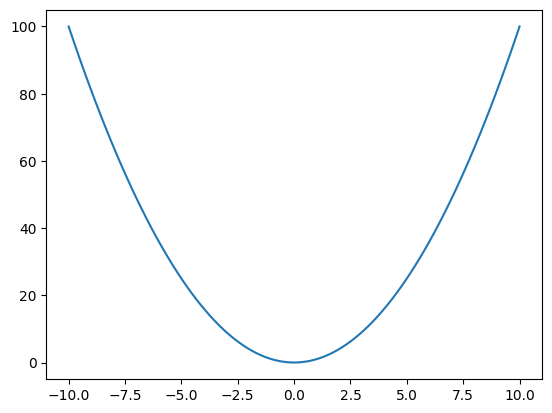

In [41]:
plt.plot(x_axis_parabola, parabola(x_axis_parabola))

__< Your answer >__

#### 2.15 Plot the approximation to the function for different order polynomials ($N \in \{1, 2, 16\}$) and with different regularization strength ($\lambda \in \{0, 10^{-3}, 10^{-2}, 1\}$). What do you observe 

In [42]:
def true_function(X):
    return np.cos(1.5 * np.pi * X)

In [43]:
X_test = np.linspace(0, 1, 100) # some grid for us on the x axis

In [44]:
n_samples = 10 # the number of points we will sample from true_function
degrees = [1, 2, 16] # the polynomial degrees we will test

X = np.sort(np.random.rand(n_samples))
y = true_function(X) + np.random.randn(n_samples) * 0.1 # add some scaled random noise

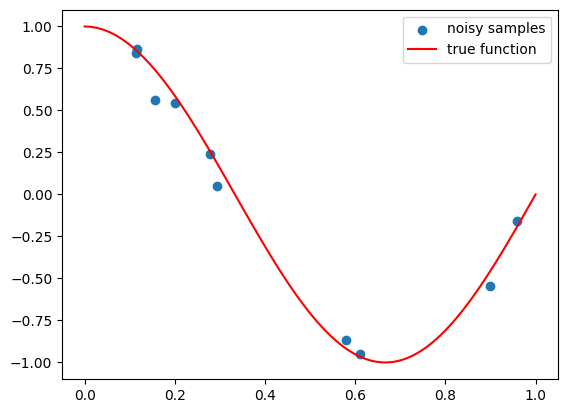

In [45]:
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

The following code will fit a polynomial regression, you need to fill the degree

In [46]:
polynomial_features = PolynomialFeatures(degree=#FILLEME,
                                             include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("linear_regression", linear_regression)])
pipeline.fit(X[:, np.newaxis], y)

SyntaxError: invalid syntax (1035794253.py, line 2)

To plot the result, you can use the following code

In [ ]:
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="model of degree ")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

Next, we can investigate the effect of the regularization parameter $\lambda$ (function parameter `alpha`), For this, you can use the following code 

In [ ]:
polynomial_features = PolynomialFeatures(degree=#fillme,
                                             include_bias=False)
ridge_regression = Ridge(alpha=#fillme)
pipeline_ridge = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", ridge_regression)])
pipeline_ridge.fit(X[:, np.newaxis], y)


For plotting you can reuse the following code

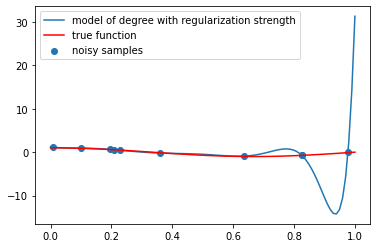

In [ ]:
plt.plot(X_test, pipeline_ridge.predict(X_test[:, np.newaxis]), label="model of degree with regularization strength")
plt.scatter(X, y, label='noisy samples')
plt.plot(X_test, true_function(X_test), c='r', label='true function')
plt.legend()

#### 2.16 What do you observe if you change the number of samples from the function?

__< Your answer >__

#### 2.17 Why do we need a test set in machine learning?

__< Your answer >__

#### 2.18 If we need to optimize hyperparameters, do we use the test set to select the best hyperparameters? (1 point)

__< Your answer >__